In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  
from scipy.stats import norm
 
data = loadmat('ex8data1.mat')  
X = data['X']   

In [2]:
print(X.shape)

(307, 2)


There are 2 features and 307 examples

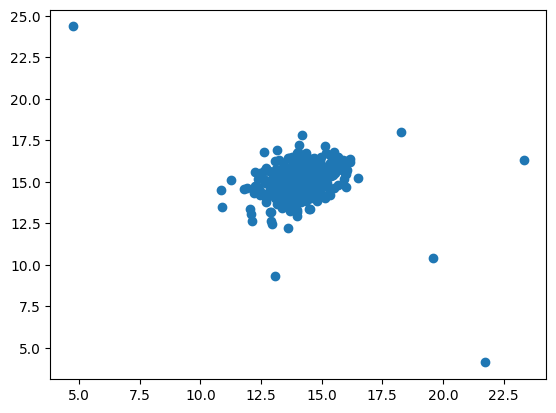

In [3]:
x1 = X[:, 0]
x2 = X[:, 1]

plt.scatter(x1, x2)

Text(0, 0.5, 'number of examples')

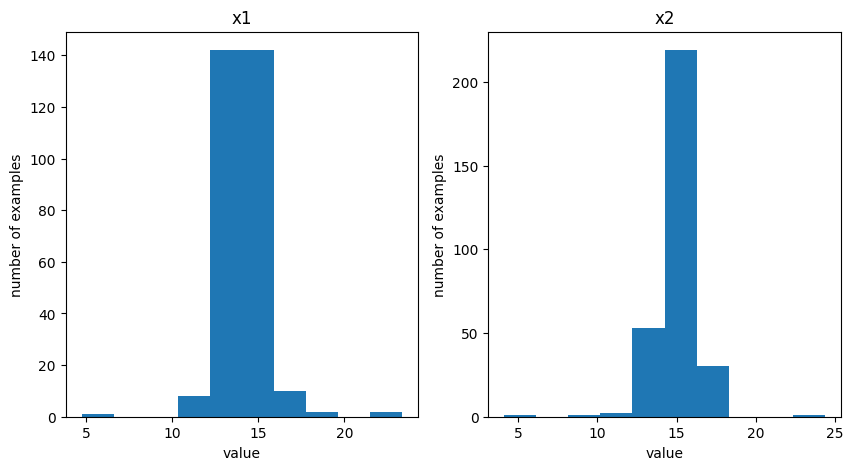

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].hist(x1)
ax[0].set_title("x1")
ax[0].set_xlabel("value")
ax[0].set_ylabel("number of examples")

ax[1].hist(x2)
ax[1].set_title("x2")
ax[1].set_xlabel("value")
ax[1].set_ylabel("number of examples")

In [5]:
def estimate_gaussian_single(X):  
# TODO: calculate mu and sigma
    N = X.shape[0]
    mu = X.sum() / N

    sigma = np.sqrt(((X - mu) ** 2).sum() / N)

    return mu, sigma

In [6]:
def estimate_gaussian(X):  
# TODO: calculate mu and sigma
    num_of_features = X.shape[1]
    result_mean = []
    result_std_dev = []
    
    for i in range(num_of_features):
        result_temp = estimate_gaussian_single(X[:, i])
        result_mean.append(result_temp[0])
        result_std_dev.append(result_temp[1])

    return np.array(result_mean), np.array(result_std_dev)

In [7]:
temp = estimate_gaussian(X)
print(temp)

(array([14.11222578, 14.99771051]), array([1.35374717, 1.3075723 ]))


In [8]:
Xval = data['Xval']  
yval = data['yval']

In [9]:
print(Xval.shape)
print((yval == 1).sum())

(307, 2)
9


There are 307 examples and 9 anomalies.

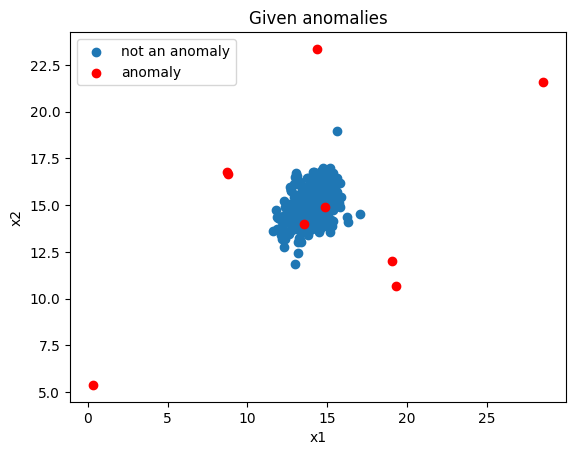

In [10]:
givenAnomaly = Xval[yval[:, 0] == 1]
notAnAnomaly = Xval[yval[:, 0] == 0]
plt.figure()
plt.title("Given anomalies")
plt.scatter(notAnAnomaly[:, 0], notAnAnomaly[:, 1])
plt.scatter(givenAnomaly[:, 0], givenAnomaly[:, 1], color='red')
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(["not an anomaly", "anomaly"])
plt.show()

## x1 standard distribution estimation

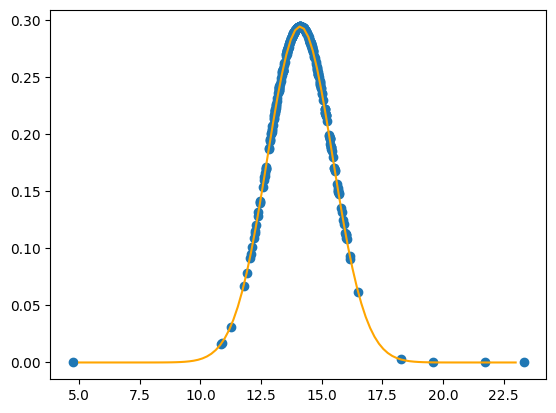

In [11]:
mean, sigma = estimate_gaussian_single(x1)
data = np.linspace(5, 23, 100)

dist1 = norm(mean, sigma)
result = dist1.pdf(x1)

plt.figure()
plt.scatter(x1, result)
plt.plot(data, dist1.pdf(data), 'orange')
plt.show()

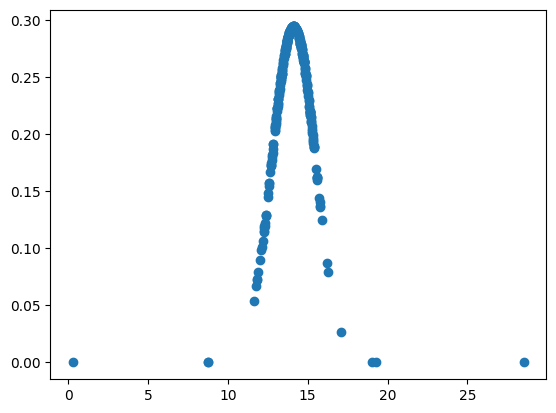

In [12]:
pval_x0 = dist1.pdf(Xval[:, 0])
pval_x0 = pval_x0.reshape((-1, 1))
plt.figure()
plt.scatter(Xval[:, 0], pval_x0)
plt.show()

In [13]:
def find_threshold(distribution, yval, steps = 1000) -> int:
    minValue = min(distribution)
    maxValue = max(distribution)

    thresholdRange = np.linspace(minValue, maxValue, steps)
    bestThreshold = thresholdRange[0]
    bestf1score = 0
    
    for threshold in thresholdRange[1:]:
        tempArray = (distribution < threshold).astype(int)
        truePositive = np.logical_and(tempArray, yval).astype(int).sum()
        falsePositive = ((tempArray == 1) & (yval == 0)).astype(int).sum()
        falseNegative = ((tempArray == 0) & (yval == 1)).astype(int).sum()
        
        precision = truePositive / (truePositive + falsePositive)
        recall = truePositive / (truePositive + falseNegative)
        
        f1score = 2 * precision * recall / (precision + recall)
        
        if f1score > bestf1score:
            bestf1score = f1score
            bestThreshold = threshold
    
    return bestThreshold

## x1 threshold

In [14]:
threshold1 = find_threshold(pval_x0, yval)
print(f"Threshold: {threshold1}")

Threshold: [0.00058998]


In [15]:
print(Xval.shape)
print(yval.shape)

(307, 2)
(307, 1)


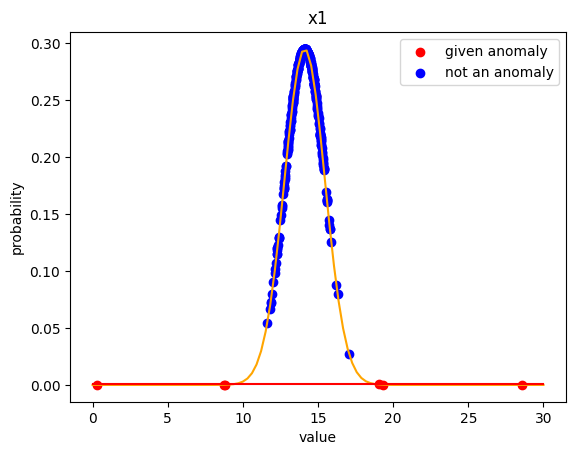

In [16]:
data = np.linspace(0, 30, 100)
constant = np.ones((100, 1)) * threshold1

givenAnomalies = Xval[yval[:, 0] == 1]
givenAnomaliesPval = pval_x0[yval[:, 0] == 1]

givenNotAnAnomaly = Xval[yval[:, 0] == 0]
givenNotAnAnomalyPval = pval_x0[yval[:, 0] == 0]

plt.figure()
plt.scatter(givenAnomalies[:, 0], givenAnomaliesPval, color='red')
plt.scatter(givenNotAnAnomaly[:, 0], givenNotAnAnomalyPval, color='blue')
plt.plot(data, dist1.pdf(data), color='orange')
plt.plot(data, constant, color='red')
plt.title("x1")
plt.legend(["given anomaly", "not an anomaly"])
plt.xlabel("value")
plt.ylabel("probability")
plt.show()

In [17]:
detectedAnomaly = Xval[pval_x0[:, 0] <= threshold1]
notAnAnomaly = Xval[pval_x0[:, 0] > threshold1]

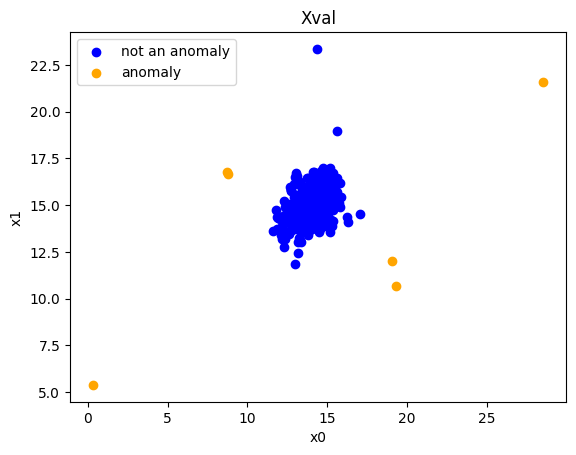

In [18]:
plt.figure()
plt.scatter(notAnAnomaly[:, 0], notAnAnomaly[:, 1], color='blue')
plt.scatter(detectedAnomaly[:, 0], detectedAnomaly[:, 1], color='orange')
plt.title("Xval")
plt.xlabel("x0")
plt.ylabel("x1")
plt.legend(["not an anomaly", "anomaly"])

## x2 standard distribution estimation

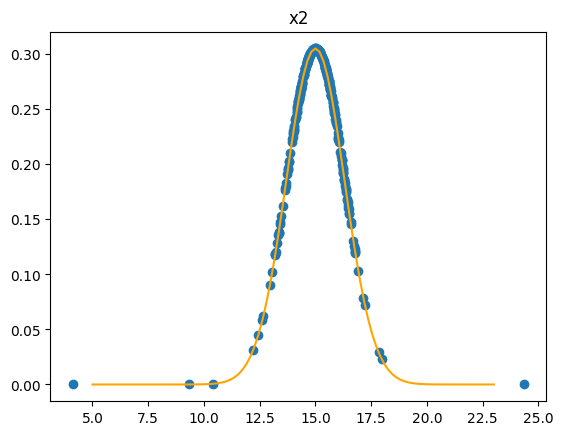

In [19]:
mean, sigma = estimate_gaussian_single(x2)
data = np.linspace(5, 23, 100)

dist2 = norm(mean, sigma)
result = dist2.pdf(x2)
plt.figure()
plt.scatter(x2, result)
plt.plot(data, dist2.pdf(data), 'orange')
plt.title("x2")
plt.show()

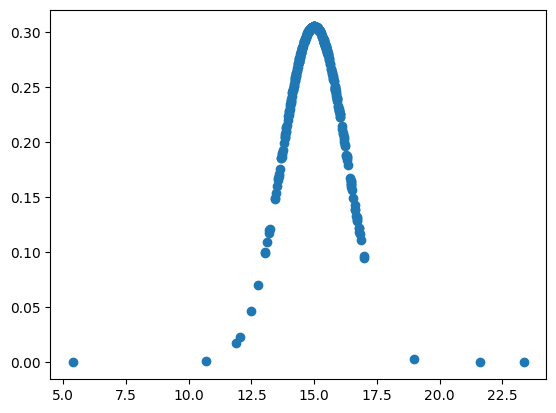

In [20]:
pval_x2 = dist2.pdf(Xval[:, 1])
pval_x2 = pval_x2.reshape((-1, 1))
plt.figure()
plt.scatter(Xval[:, 1], pval_x2)
plt.show()

## x2 threshold

In [21]:
threshold2 = find_threshold(pval_x2, yval)
print(f"Threshold: {threshold2}")

Threshold: [0.02321092]


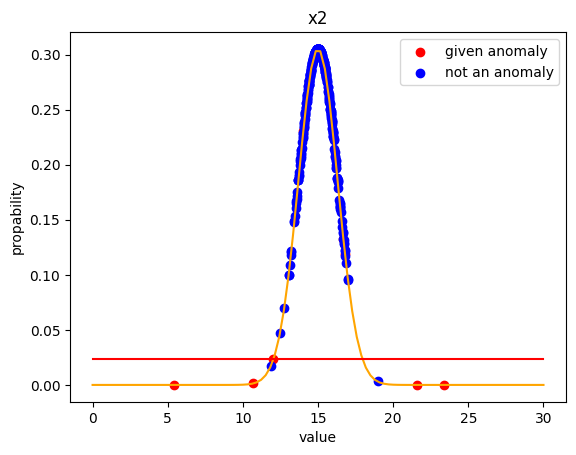

In [22]:
data = np.linspace(0, 30, 100)
constant = np.ones((100, 1)) * threshold2

givenAnomalies = Xval[yval[:, 0] == 1]
givenAnomaliesPval = pval_x2[yval[:, 0] == 1]

givenNotAnAnomaly = Xval[yval[:, 0] == 0]
givenNotAnAnomalyPval = pval_x2[yval[:, 0] == 0]

plt.figure()
plt.scatter(givenAnomalies[:, 1], givenAnomaliesPval, color='red')
plt.scatter(givenNotAnAnomaly[:, 1], givenNotAnAnomalyPval, color='blue')
plt.plot(data, dist2.pdf(data), color='orange')
plt.plot(data, constant, color='red')
plt.title("x2")
plt.legend(["given anomaly", "not an anomaly"])
plt.xlabel("value")
plt.ylabel("propability")
plt.show()

In [23]:
print(pval_x0.shape)
print(pval_x2.shape)

(307, 1)
(307, 1)


In [24]:
detectedAnomaly = Xval[(pval_x0[:, 0] <= threshold1) | (pval_x2[:, 0] <= threshold2)]
notAnAnomaly = Xval[(pval_x0[:, 0] > threshold1) | (pval_x2[:, 0] > threshold2)]

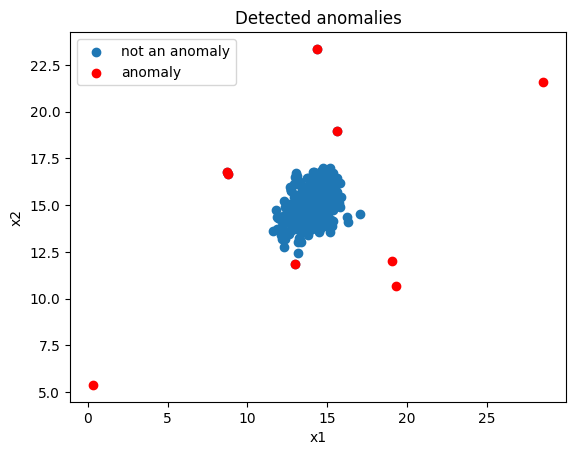

In [25]:
plt.figure()
plt.scatter(notAnAnomaly[:, 0], notAnAnomaly[:, 1])
plt.scatter(detectedAnomaly[:, 0], detectedAnomaly[:, 1], color='red')
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(["not an anomaly", "anomaly"])
plt.title("Detected anomalies")
plt.show()

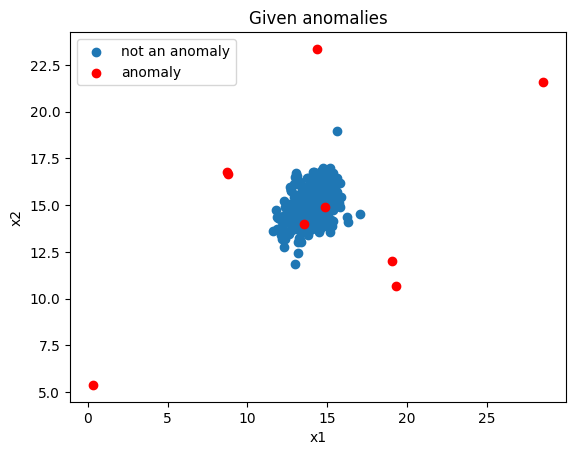

In [26]:
givenAnomaly = Xval[yval[:, 0] == 1]
notAnAnomaly = Xval[yval[:, 0] == 0]
plt.figure()
plt.title("Given anomalies")
plt.scatter(notAnAnomaly[:, 0], notAnAnomaly[:, 1])
plt.scatter(givenAnomaly[:, 0], givenAnomaly[:, 1], color='red')
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(["not an anomaly", "anomaly"])
plt.show()